<a href="https://colab.research.google.com/github/danielsovres/Aulas/blob/main/AULA_Machine_Learning_KNN_Classifica%C3%A7%C3%A3o_Comentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESUMO DA AULA
====================
O professor mostrou como utilizar e otimizar um modelo de ML utilizando o KNN   
Base = tumores malignos e benignos

# Aula 01 - K-nearest neighbors (KNN) (Classificação)

Nesta aula, vamos explorar o K-nearest neighbors (KNN)! Iremos enfocar uma aplicação de classificação e, na aula seguinte, falaremos sobre sua aplicação à regressão.

<img src="https://www.researchgate.net/profile/Mohammed-Badawy/publication/331424423/figure/fig1/AS:732056359297024@1551547245072/Example-on-KNN-classifier.png" width=600>

###  

## K-Nearest Neighbors ou K-Vizinhos

O modelo K-Nearest Neighbors (KNN), ou K-Vizinhos, é um dos algoritmos mais simples em Machine Learning, cuja ideia de aplicação é: iremos definir se um dado pertence ou não a uma classe - ou no caso multi classes para qual das classes irá pertencer -, a partir de cálculos de **distâncias!** <br><br>

A cada observação nova que devemos classificar, será feito o cálculo de distância das $K$ observações mais próximas em relação ao elemento a ser classificado e, de acordo com a classificação desses vizinhos próximos, será definida a classe da observação:

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" width=600>

Devido à sua simplicidade, o KNN tem um **custo computacional mais baixo** em relação a outros modelos. Entretanto, **ele não aprende** com os dados já observados, ou seja: toda vez que tivermos novos dados, serão calculadas todas as ditâncias para definir os elementos mais próximos e, assim, conseguir classificá-lo.<br><br>

Existem vários tipos de distâncias que podemos utilizar no KNN; por exemplo: [Euclidiana](https://en.wikipedia.org/wiki/Euclidean_distance), [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance), [Cosseno](https://cmry.github.io/notes/euclidean-v-cosine) e [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).<br><br>

A distância Euclidiana é a que geralmente estamos mais habituados; é aquela a qual costumamos atribuir o sentido de "distância em linha reta". A figura abaixo ilustra o cálculo para a distância Euclidiana entre dois pontos quaisquer em um espaço x-y (podemos pensar nesses pontos, por exemplo, como correspondendo a duas observações distintas de um vetor de atributos).

<img src="https://rosalind.info/media/Euclidean_distance.png" width=300>

In [1]:
#OBS: Custo computacional não é grande - mas não aprende com os dados (sempre tem que rodar do 0)

Em suma, o processo de modelagem para o KNN engloba usualmente as seguintes etapas:

1. Recebe um dado não classificado;
2. Mede sua distância (Euclidiana, Manhattan, Minkowski ou Ponderada) a cada um dos elementos da base de treino;
3. Obtém um *ranking* das distâncias, em ordem decrescente;
4. Verifica a classe de cada uma das *K* observações que tiveram a menor distância, e conta a quantidade correspondente a cada classe;
5. Toma como resultado a classe que mais apareceu dentre os dados que tiveram as menores distâncias;
6. Classifica o novo dado com a classe tomada como resultado da classificação.

Mas sempre que olhamos para o nosso processo de modelagem (como o exemplo acima), a primeira dúvida que vem na cabeça é:

> Qual é o número de vizinhos adequados: i.e., **como escolher $k$?**

Essa é uma escolha particularmente importante, pois escolhas diferentes de $k$ podem facilmente levar a classificações diferentes:

<img src="https://helloacm.com/wp-content/uploads/2016/03/2012-10-26-knn-concept.png" width=400>

In [ ]:
#O que pode prejudicar a eficácia do modelo =
#Problemas: Possuir número elevado de atributos /// falta de escalonamento.
#Soluções: podem ser abordadas as variáveis mais relevantes /// dados podem ser normalizados

Abaixo temos uma animação de como o método funciona:

<img src = "https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif" width = 600>

[Esta referência](https://machinelearningknowledge.ai/k-nearest-neighbor-classification-simple-explanation-beginners/) tem algumas boas animações que podem ser úteis para ajudar a entender o passo a passo do método!

___

## Exemplo Prático

Passemos, agora, a um dataset contendo características para identificar câncer de mama.

In [ ]:
import pandas as pd
df = pd.read_csv("datasets/breast_cancer.csv")

#### Lendo conjunto de dados

Como exemplo, vamos utilizar dados de Câncer de Mama, esses dados estão disponiveis também no [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) ou pelo site do [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

A ideia é que consigamos construir um modelo classificador entre câncer maligno e benigno.

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape #quantos dados tenho

(569, 32)

In [ ]:
df.info() #ver se preciso preocupar com nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(columns = "id", inplace = True) #tirar coluna de ID (não será útil)

In [ ]:
df.describe() #ver se os min e max estão em escalas muito diferentes
#se sim, normalizar os dados

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df["diagnosis"].value_counts(normalize = True)
#quero analisar a coluna de diagnósticos (Maligno ou Benigno)
#Vamos normalizar os dados para ver se tem alguma classe muito predominante
#Proporção é quase 60/40 = OK

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

Apesar de termos dados desbalanceados, neste caso, não temos uma única classe muito predominante (>80-90% dos dados), de modo que o desbalanceamento não é um grande agravante. Então continuaremos a usar os dados sem grandes tratamentos, mas no percorrer do curso aprenderemos algumas técnicas para lidar com dados desbalanceados.

In [ ]:
# separando as features (X maiúsculo) e o target (y minúsculo)
X = df.drop(columns = "diagnosis") #X = tudo menos a coluna dignosis = features
y = df["diagnosis"] #Y = só a coluna diagnósticos = target

In [ ]:
# train_test_split = Divisão de Treino e Teste
from sklearn.model_selection import train_test_split
#from skllearn.model_selection import train_test_split - importar train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)
#separei X_train, X_test (teste e treinamento de X) e y_train, y_test(teste e treinamento de y)
#X(features), y(target), test_size = 0.3 (30% de dados para teste e 70% de dados para treino)
#random_state = 4 - É a "semente" da aleatoriedade. Toda vez que você rodar o código, a divisão é a mesma.
#stratify = y - garantir que a proporção do y será mantida

"""
O Retorno (O que você recebeu)
A função devolve quatro "fatias" de dados, e a ordem importa muito:

X_train: As características que o modelo vai usar para aprender padrões.

X_test: As características que o modelo nunca viu, usadas para a prova final.

y_train: As respostas certas referentes ao X_train.

y_test: O gabarito real do X_test para compararmos com as previsões do modelo.

Por que isso é importante?
Sem essa divisão, você cairia no erro do Overfitting (sobreajuste).
Seria como dar a um aluno a mesma prova que ele usou para estudar:
ele tiraria 10, mas não saberia resolver um problema novo na vida real.


"""

#### Transformações dos Dados

Em alguns modelos de classificação, principalmente em modelos baseados em distâncias, é **sempre importante transformarmos nossos dados para escalas parecidas**. Isso é necessário pois dependendo da ordem de grandeza de cada um das variáveis isso pode influenciar nos cálculos do nosso modelo. As transformações mais comuns são [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) e [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler). Vamos utilizar o _StandardScaler_ a seguir.

In [ ]:
#normalização de dados = StardardScaler e MinMaxScaler

A ideia da normalização do *StandardScaler* é subtrair, de cada observação, a média da distribuição, e dividir pelo desvio-padrão:

$z = \frac{x - \mu}{\sigma}$.

Isso *normaliza* a distribuição dos dados no sentido de torná-la uma normal com média 0 e desvio-padrão unitário: N(0,1). Isso faz com que as distribuições fiquem mais diretamente comparáveis entre si.

<img src="https://miro.medium.com/max/992/1*dZlwWGNhFco5bmpfwYyLCQ.png" width=500>

Já o *MinMaxScaler* normaliza os valores para que o resultado fique compreendido, por padrão, no intervalo [0,1] (este intervalo pode ser especificado como entrada da função), conforme ilustrado na figura abaixo. Neste caso, a normalização que fazemos é:

$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}.$

<img src="https://sofapirate.github.io/Plaquette/_images/Plaquette-MinMaxScaler.png" width=500>

#### Continuando com o *scaling* dos nossos dados:

In [ ]:
X_train.head() #dados antes

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,15.85,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782
341,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,0.2036,0.07125,...,10.75,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.08120,0.2982,0.09825
562,15.220,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.23560,0.4089,0.14090
499,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999
17,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420


In [ ]:
from sklearn.preprocessing import StandardScaler
#importar o StandardScaler da biblioteca sklearn.preprocessing

In [ ]:
scaler = StandardScaler() #instancio o scaler
X_train_scaled = scaler.fit_transform(X_train) # já faz o fit e transforma o dado
#Criar a categoria X_train_scaled, transformando o X_train em X_train_scaled
#utilizar a ferramenta StandardScaler().fit_transform(coluna)

#OBS: SÓ REALIZA FIT NOS DADOS DE TREINO, NÃO NOS DE TESTE
#Nos dados de teste, utilizaremos a função StandardScaler().transform(X_test) - não .fit_transform
#O FIT estuda os dados e o TRANSFORM transforma, portanto, se fizermos FIT no treino e no teste, teremos DATA LEAKAGE


<AxesSubplot: xlabel='radius_mean', ylabel='Count'>

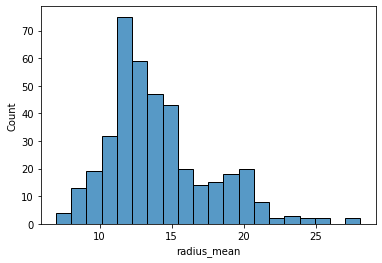

In [ ]:
import seaborn as sns

sns.histplot(X_train.iloc[:,0]) #imprime um histplot de X_train
#iloc[:,0] - imprime só a primeira coluna [0]

<AxesSubplot: ylabel='Count'>

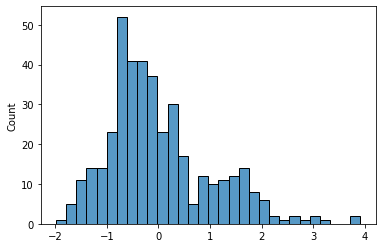

In [ ]:
sns.histplot(X_train_scaled[:, 0], bins = 30)
#histplot de x_train_scaled
#[:,0] - garante que só vou imprimir a primeira coluna (só pra checar)

In [ ]:
# O mesmo objeto "scaler" é usado para os dados de teste (não faz o fit novamente!)
X_test_scaled = scaler.transform(X_test) #transformar o X_test

# equivalente a X_test_scaled = (X_test - X_train.mean())/(X_train.std()), se não usamos o Scaler

Agora vamos para o nosso processo padrão de instância, fit e predict para o modelo:<br>
Deixarei o link do Scikit-Learn para [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # importando o KNN classificador
#agora vamos fazer o KNN de verdade
#importar o KNeighborsClassifier da biblioteca sklearn.neighbors

In [ ]:
# Faça a chamada do modelo
model = KNeighborsClassifier(n_neighbors = 5)
#model = função calculada para 5 vizinhos de K

In [ ]:
model

KNeighborsClassifier()

In [ ]:
# Fit do modelo (treinamento)
model.fit(X_train_scaled, y_train)
#treinando X e y trains
#KneighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Predições do modelo
y_pred = model.predict(X_test_scaled)
#y_pred recebe KneighborsClassifier(n_neighbors = 5).predict(X_test_scaled)
y_pred #primeiro eu treino, depois eu predito

array(['B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B'], dtype=object)

In [ ]:
pd.Series(y_pred).value_counts(normalize = True)
#transformo o dado em uma série e uso o value_counts(normalize=True) para checar minha proporção de predição
#O numpy não tem value_counts(), por isso, tenho que transformar em pd.Series(dado).value_counts(normalize = True)

B    0.666667
M    0.333333
dtype: float64

In [ ]:
df_results = pd.concat([y_test.reset_index(), pd.Series(y_pred)], axis = 1).drop(columns = "index").rename(columns =
                                                                                              {"diagnosis": "Actual",
                                                                                              0: "Predicted"}) #sem explicação do professor

In [ ]:
df_results["Actual"] = df_results["Actual"].apply(lambda x: 1 if x == "M" else 0)
df_results["Predicted"] = df_results["Predicted"].apply(lambda x: 1 if x == "M" else 0) #sem explicação do professor

In [ ]:
abs(df_results["Actual"] - df_results["Predicted"]).sum()/df_results.shape[0] #sem explicação do professor

0.04093567251461988

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

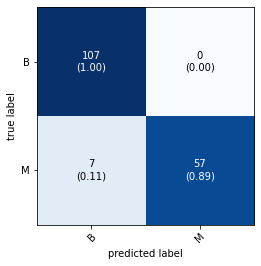

In [ ]:
from sklearn.metrics import confusion_matrix #importamos a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix #importamos o plot

cm = confusion_matrix(y_test, y_pred)
#cria matriz que conta acertos e erros
#Verdadeiros negativos (OK) - Falsos positivos (alarme falso)
#Falsos negativos (erro mais perigoso) - Verdadeiros positivos (OK)
#(y_test, y_pred) = passa os dados da target

plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ["B", "M"])
#pega os números secos da matriz e transforma em um gráfico de calor
#conf_mat=cm = (de onde vou pegar os dados), show_normed=True (mostrar percentuais)
#class names =['B', 'M'] = números das classes

### Definindo o valor de K vizinhos

No exemplo acima, elaboramos o classificador utilizando os 5 vizinhos mais próximos a cada observação. Mas e se quiséssemos tentar otimizar esta escolha? Como poderíamos fazer?

Podemos utilizar uma "regra prática" escolhendo $K = \sqrt{N}$, sendo *N* o número disponível de exemplos na nossa base.

In [ ]:
#Podemos melhorar nosso modelo de predição definindo o valor de K ideal

In [ ]:
X_train.shape #quantas linhas (pegar o n de linhas)

(398, 30)

In [ ]:
import numpy as np
k = np.sqrt(398) #tiro a raiz quadrada de n (quantas linhas tenho)
print(k)

19.949937343260004


In [ ]:
#Verifiquei que é melhor fazer o KNN com 20 neighbors neighbors

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=20) #repito com 20 neighbors

In [ ]:
KNN.fit(X_train_scaled, y_train) #fazer o fit novamente
#re-treinar o KNN para fazer o cálculo novamente

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = KNN.predict(X_test_scaled)
#primeiro eu treino, depois eu predito
#fazer o KNN.predict(utilizando o X_test_scaled)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

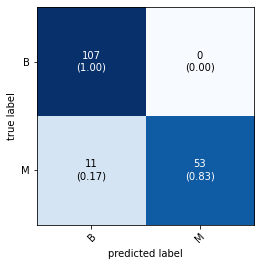

In [ ]:
cm = confusion_matrix(y_test, y_pred)#matriz de confusão de novo
plot_confusion_matrix(conf_mat = cm, show_normed = True, class_names = ["B", "M"]) #rodar o código de novo

In [ ]:
#No n=20, diminuimos os falsos positivos, mas aumentamos os falso negativos

___